In [1]:
import re
import json
import matplotlib.pyplot as plt
import codecs
import numpy as np
import jieba

def load_train_data(train_file):
    news_id = set()
    emotions_dict = {'POS':0, 'NEG':0, 'NORM':0}
    emotion = []
    with open(train_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            entities = data['coreEntityEmotions']
            emo_tmp = []
            for a in entities:
                if a['emotion'] == 'POS':
                    emotions_dict['POS'] += 1
                elif a['emotion'] == 'NEG':
                    emotions_dict['NEG'] += 1
                else:
                    emotions_dict['NORM'] += 1
                
                emo_tmp.append(a['emotion'])
            emotion.append(emo_tmp)
            
    print("emotions_dict:{}".format(emotions_dict))

    return emotions_dict, emotion

In [2]:
basedir = '../input_data'
train_file = basedir + '/coreEntityEmotion_train.txt' 
test_file = basedir + '/coreEntityEmotion_test_stage1.txt'
ner_file = basedir + '/nerDict.txt'
stop_words_file = basedir + '/stop_words_mine.txt'

emotions_dict, emotion = load_train_data(train_file)
print(len(emotion))

emotions_dict:{'POS': 43171, 'NEG': 11029, 'NORM': 33137}
40000


In [3]:
for i in range(10):
    print(emotion[i])

['POS', 'POS', 'POS']
['POS', 'POS', 'POS']
['POS', 'NEG', 'POS']
['NORM', 'NORM', 'NORM']
['POS', 'POS', 'POS']
['NORM', 'NORM', 'NORM']
['NORM', 'NORM', 'NORM']
['NORM', 'NORM', 'NORM']
['POS', 'NORM', 'NORM']
['NORM', 'NORM', 'POS']


min:1
max:8
mean:2.183425
median:2.0
mode:3
std:0.789544342880753


(array([9.3060e+03, 1.4170e+04, 1.6438e+04, 0.0000e+00, 6.3000e+01,
        1.6000e+01, 0.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

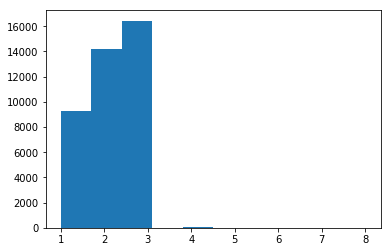

In [7]:
emotion_len = [len(i) for i in emotion]

print("min:{}".format(np.min(emotion_len)))
print("max:{}".format(np.max(emotion_len)))
print("mean:{}".format(np.mean(emotion_len)))
print("median:{}".format(np.median(emotion_len)))
print("mode:{}".format(np.argmax(np.bincount(emotion_len))))
print("std:{}".format(np.std(emotion_len)))
plt.hist(emotion_len, bins=10)